# Genetic Algorithm Approach

Time series prediction with genetic algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from scipy import stats
from scipy import spatial
import time
from sklearn.metrics import mean_absolute_error
import random
import math
import time

In [ ]:
data = pd.read_csv('monthlyBeer.csv')


In [ ]:
data.columns = ['Month','beerProduction']

In [ ]:
data = data.bfill()

In [ ]:
beerProduction_mean= data.beerProduction.mean()
beerProduction_DiffMean = data.beerProduction.diff().mean()
beerProduction_Diff_Var = (np.var(data.beerProduction.diff()))**(1/2)
nDay = 60

In [ ]:
def reduce_data(dataFrame,Series,day_range):
    for i in range(dataFrame.shape[0]-day_range*4):
        values_mean = Series[dataFrame.shape[0]-day_range*2:dataFrame.shape[0]].values.mean()
        Series[i:i+nDay*2] = Series[i:i+nDay*2] + (values_mean-Series[i:i+nDay*2].mean())
        
    return dataFrame

In [ ]:
def createPopulation(adet,day_range,mean,diffmean):
    Population = []
    for i in range(adet):
        gen = []
        for j in range(day_range*2):
            gen.append(random.randint(int(mean-diffmean)-1,int(mean+diffmean)+1))
        Population.append(gen)
        
    return Population

In [ ]:
def train(dataFrame,Series,GenHavuzu,day_range):
    seçili_genler = []
    
    for i in range(dataFrame.shape[0]-day_range*2):
        values = Series[i:i+day_range*2].values
        min_mae = mean_absolute_error(GenHavuzu[0],values)
        for gen in GenHavuzu:
            mae = mean_absolute_error(gen,values)
            if mae < min_mae:
                min_mae = mae
                seçili_genler.append([GenHavuzu.index(gen),i])
                
                
    return seçili_genler

In [ ]:
for i in range(100):
    data_train = reduce_data(data,data.beerProduction,nDay)

In [ ]:
plt.plot(data_train.beerProduction,color = 'green')
plt.plot(data.beerProduction,color ='red')
plt.ylabel('simulation result of ratios')
plt.show()

In [ ]:
topList = []
value = 0
i = 0
j = 0
while( i <= len(seçili_Genler)):
    try:
        if seçili_Genler[j][1] == i:
            value = seçili_Genler[i][0]
            j += 1
        else:
            topList.append(value)
            print(value)
            i += 1
    except IndexError:
        break

In [ ]:
öncelikliListe, öncelikliListe_counts = np.unique(topList,return_counts=True)
modifiedGen = []

In [ ]:
def crossover(Series,day_range):
    global data
    global öncelikliListe
    global öncelikliListe_counts
    global genHavuzu
    global topList 
    global modifiedGen
    genHavuzu = np.array(genHavuzu)
    for i in range(data.shape[0]-day_range*4,data.shape[0]-day_range*2):
        öncelikliListe, öncelikliListe_counts = np.unique(topList,return_counts=True)
        values = Series[i:i+day_range*2].values
        run = True
        batch_threshold = 20
        batch = 0
        while(run):
            if batch >= batch_threshold:
                run = False
            genHavuzu_Selected = np.random.choice(öncelikliListe,4,p = öncelikliListe_counts/sum(öncelikliListe_counts))
            oldGen_1_15 = np.random.choice(genHavuzu[genHavuzu_Selected[0]-1],int(day_range/2))
            oldGen_2_15 = np.random.choice(genHavuzu[genHavuzu_Selected[1]-1],int(day_range/2))
            oldGen_3_15 = np.random.choice(genHavuzu[genHavuzu_Selected[2]-1],int(day_range/2))
            oldGen_4_15 = np.random.choice(genHavuzu[genHavuzu_Selected[3]-1],int(day_range/2))
            modifiedGen =  np.concatenate((oldGen_1_15, oldGen_2_15,oldGen_3_15,oldGen_4_15),axis =None)
            target = mean_absolute_error(modifiedGen,values)
            val_1 = genHavuzu[genHavuzu_Selected[0]-1]
            val_2 = genHavuzu[genHavuzu_Selected[1]-1]
            val_3 = genHavuzu[genHavuzu_Selected[2]-1]
            val_4 = genHavuzu[genHavuzu_Selected[3]-1]
            thr_1 = mean_absolute_error(val_1,values)
            thr_2 = mean_absolute_error(val_2,values)
            thr_3 = mean_absolute_error(val_3,values)
            thr_4 = mean_absolute_error(val_4,values)
            if  target < thr_1 and target < thr_2 and target < thr_3 and target < thr_4:
                print("Completed")
                genHavuzu = np.vstack((genHavuzu, modifiedGen))
                topList.append(len(genHavuzu))
                batch += 1

In [ ]:
crossover(data.beerProduction,nDay)

In [ ]:
öncelikliListe, öncelikliListe_counts = np.unique(topList,return_counts=True)
modifiedGen = []

In [ ]:
def mutation_gen(gen,Series):
    x = np.random.choice(gen,10)
    for i in range(len(gen)):
        if gen[i] in x:
            gen[i] = np.random.choice(Series.values)
            
            
    return gen

In [ ]:
def modification(Series,day_range):
    global data
    global öncelikliListe
    global öncelikliListe_counts
    global genHavuzu
    global topList 
    global modifiedGen
    mutated_kromozom = np.zeros(day_range*2)
    nonMutated_kromozom = np.zeros(day_range*2)
    genHavuzu = np.array(genHavuzu)
    for i in range(data.shape[0]-day_range*4,data.shape[0]-day_range*2):
        öncelikliListe, öncelikliListe_counts = np.unique(topList,return_counts=True)
        values = Series[i:i+day_range*2].values
        run = True
        batch_threshold = 100
        batch = 0
        while(run):
            if batch >= batch_threshold:
                run = False
            genHavuzu_Selected = np.random.choice(öncelikliListe,1,p = öncelikliListe_counts/sum(öncelikliListe_counts))
            mutated_kromozom = mutation_gen(list(genHavuzu[genHavuzu_Selected[0]-1]),Series)
            nonMutated_kromozom = genHavuzu[genHavuzu_Selected[0]-1]
            thr_1 = mean_absolute_error(mutated_kromozom,values)
            org_1 = mean_absolute_error(nonMutated_kromozom,values)
            batch += 1
            if  thr_1 < org_1:
                print("Completed")
                genHavuzu = np.vstack((genHavuzu[:,0], mutated_kromozom))
                topList.append(len(genHavuzu))

In [ ]:
modification(data.beerProduction,nDay)

In [ ]:
seçilmişGenler = genHavuzu[2000:len(genHavuzu)]
#seçilmişGenler means selected gens

In [ ]:
def select_the_max(Series,day_range):
    global seçilmişGenler
    seçilmişGenler = list(seçilmişGenler)
    min_mae = mean_absolute_error(seçilmişGenler[0][0:day_range],Series[data.shape[0]-day_range:data.shape[0]])
    lastGen = []
    for gen in seçilmişGenler:
        if mean_absolute_error(gen[0:day_range],Series[data.shape[0]-day_range:data.shape[0]]) < min_mae:
            min_mae = mean_absolute_error(gen[0:day_range],Series[data.shape[0]-day_range:data.shape[0]])
            lastGen = gen
    return lastGen,min_mae

In [ ]:
sonGen,Hata = select_the_max(data.beerProduction,nDay)

In [ ]:
def sonDegerModifikasyon(Series,day_range):
    global sonGen
    Last_gen = np.zeros(day_range)
    for i in range(100000):
        mutated_kromozom = mutation_gen(list(sonGen),Series)
        target = Series[data.shape[0]-day_range:data.shape[0]]
        val_1 = sonGen[0:day_range]
        org_1 = mean_absolute_error(val_1,target)
        thr_1 = mean_absolute_error(mutated_kromozom[0:day_range],target)
        if  thr_1 < org_1:
            if (mean_absolute_error(mutated_kromozom[0:day_range],target)) < (mean_absolute_error(Last_gen[0:day_range],target)):
                Last_gen = mutated_kromozom
                print("Completed")
            
            
    return Last_gen

In [ ]:
Son_elenmiş_gen = sonDegerModifikasyon(data.beerProduction,nDay)

In [ ]:
plt.plot(Son_elenmiş_gen,color = 'green')
plt.plot(data['beerProduction'].values[data.shape[0]-nDay:data.shape[0]],color ='red')
plt.ylabel('simulation result of ratios')
plt.show()

In [ ]:
target = data.beerProduction[data.shape[0]-nDay:data.shape[0]]
val_1 = Son_elenmiş_gen[0:nDay]
org_1 = mean_absolute_error(val_1,target)
org_1
12.7552167839006

# SORTING ALGORITHM CUSTOM APPROACH


In [ ]:
def diffMaxSortingAlgo(array):
  MaxNum = max(array)
  MinNum = min(array)

  allNumbers = [0 for i in range(2*(abs(MaxNum)+abs(MinNum)))]
  for i in range(len(array)):
    allNumbers[abs(MaxNum-array[i])] = array[i]
  allNumbers = [i for i in allNumbers if i != 0]
  return allNumbers

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

In [ ]:
def diffMaxSortingAlgo(array, typeSort="integer"):
    MaxNum = max(array)
    MinNum = min(array)
    
    multiplier = 1

    if typeSort != "integer":
        multiplier = 10**len(str(int(abs(MinNum))))
        array = [i * multiplier for i in array]

    allNumbers = [0 for _ in range(int(2 * (abs(MaxNum * multiplier) + abs(MinNum * multiplier))))]

    for i in range(len(array)):
        if typeSort != "integer":
            index = int(abs(MaxNum * multiplier - array[i]))
        else:
            index = int(abs(MaxNum - array[i]))

        if typeSort != "integer":
          rational_num = array[i]/multiplier
          allNumbers[index] = rational_num
        else:
          allNumbers[index] = array[i]

    allNumbers = [i for i in allNumbers if i != 0]
    return allNumbers

In [ ]:
def diffMaxSortingAlgo(array, typeSort="integer"):
    MaxNum = max(array)
    MinNum = min(array)
    
    multiplier = 1

    if typeSort != "integer":
        multiplier = 10**len(str(int(abs(MinNum))))
        array = [i * multiplier for i in array]

    allNumbers = [0 for _ in range(int(2 * (abs(MaxNum * multiplier) + abs(MinNum * multiplier))))]

    for i in range(len(array)):
        if typeSort != "integer":
            index = int(abs(MaxNum * multiplier - array[i]))
        else:
            index = int(abs(MaxNum - array[i]))

        if typeSort != "integer":
          rational_num = array[i]/multiplier
          allNumbers[index] = rational_num
        else:
          allNumbers[index] = array[i]

    allNumbers = [i for i in allNumbers if i != 0]
    return allNumbers


def counting_sort(arr):
    if not arr:
        return arr

    # Find the maximum and minimum values in the array
    max_value = max(arr)
    min_value = min(arr)

    # Calculate the range of values
    value_range = max_value - min_value + 1

    # Initialize the count array and the result array
    count_array = [0] * value_range
    result_array = [0] * len(arr)

    # Count the occurrences of each element
    for num in arr:
        count_array[num - min_value] += 1

    # Calculate the cumulative count array
    for i in range(1, len(count_array)):
        count_array[i] += count_array[i - 1]

    # Build the result array
    for num in reversed(arr):
        result_array[count_array[num - min_value] - 1] = num
        count_array[num - min_value] -= 1

    return result_array

In [ ]:
mergeSortTime = []
diffMaxSortingAlgoTime = []
countingSortTime = []
for i in range(1,100):
  listOfNumbers = [random.randint(-1000,1000) for i in range(100*i)]

  start_time = time.time()
  sorted_data = diffMaxSortingAlgo(listOfNumbers,typeSort="integer")
  diffMaxSortingAlgoTime.append(time.time() - start_time)

  start_time = time.time()
  sorted_data = counting_sort(listOfNumbers)
  countingSortTime.append(time.time() - start_time)

# String Distance

In [ ]:
def string_distance(string_1,string_2):
  distances = []
  for i in range(len(string_1)):
    selected_string = string_1[i::]
    distance = abs(len(selected_string)-len(string_2)) + i
    for let1,let2 in zip(selected_string,string_2):
      if let1 != let2:
        distance += 1

    distances.append(distance)
  return min(distances)

In [ ]:
def levenshtein_distance(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    # Create a 2D matrix to store distances
    matrix = [[0] * len_str2 for _ in range(len_str1)]

    # Initialize the matrix
    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j

    # Populate the matrix with minimum distances
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,       # Deletion
                matrix[i][j - 1] + 1,       # Insertion
                matrix[i - 1][j - 1] + cost  # Substitution
            )

    # The bottom-right cell contains the Levenshtein distance
    return matrix[-1][-1]

In [ ]:
print(string_distance("kitten","sitting"),levenshtein_distance("kitten","sitting"))
print(string_distance("flaw","lawn"),levenshtein_distance("flaw","lawn"))
print(string_distance("intention","execution"),levenshtein_distance("intention","execution"))
print(string_distance("hola","hello"),levenshtein_distance("hola","hello"))
print(string_distance("book","back"),levenshtein_distance("book","back"))

In [ ]:
def string_distance(string_1,string_2):
  distances = []
  for i in range(len(string_1)):
    selected_string = string_1[i::]
    distance = abs(len(selected_string)-len(string_2)) + i
    for let1,let2 in zip(selected_string,string_2):
      if let1 != let2:
        distance += 1

    distances.append(distance)
  if len(distances) > 0:
    return min(distances)
  else:
    return abs(len(string_1)-len(string_2))

In [ ]:
import time

levinsteinDistanceVal = []
customFuncVal = []
for i in range(1,100):
  
  a = create_random_string(i)
  b = create_random_string(i)

  start_time = time.time()
  resultFactors = levenshtein_distance(a,b)
  levinsteinDistanceVal.append(time.time() - start_time)

  start_time = time.time()
  resultFactors = string_distance(a,b)
  customFuncVal.append(time.time() - start_time)

In [ ]:

def string_distance(string_1,string_2):
  distances = []
  for i in range(len(string_1)):
    selected_string = string_1[i::]
    distance = abs(len(selected_string)-len(string_2)) + i
    for let1,let2 in zip(selected_string,string_2):
      if let1 != let2:
        distance += 1

    distances.append(distance)
  if len(distances) > 0:
    return min(distances)
  else:
    return abs(len(string_1)-len(string_2))

# N_Queen Genetic Algo Approach

In [ ]:
import numpy as np
import random
import time

def n_queens_genetic_algorithm(n_queens, sol_number):
    Population = []

    def fitnessFunction(array):
        score = 0
        for x, y in enumerate(array):
            for x2 in range(x + 1, len(array)):
                if abs((x - x2)) == abs(y - array[x2]) or y == array[x2]:
                    score -= 10
        return score

    def Mutate(gen):
        for i, el in enumerate(gen):
            for j in range(i + 1, len(gen)):
                if abs((i - j)) == abs(el - gen[j]) or el == gen[j]:
                    gen[j] = random.randint(1, n_queens)

    scores = []
    zero_count = 0
    count_First = []
    for i in range(100000):
        gen = [random.randint(1, n_queens) for _ in range(n_queens)]
        Population.append(gen)
        scoreFintess = fitnessFunction(gen)
        scores.append(scoreFintess)
        sorted_data = sorted(zip(scores, Population), reverse=True)

        Population = [x for _, x in sorted_data][:300]
        scores = sorted(scores, reverse=True)[:300]
        scores_repeat = scores[:]
        countFirstNum = scores[0]
        count_First.append(countFirstNum)

        countZero = scores.count(0)
        if countZero >= sol_number:
            return np.unique(np.array(Population[:countZero]), axis=0)
            break
            
        for _ in range(10):
            try:
                index = random.randint(0, 99)
                Mutate(Population[index])
                scores[index] = fitnessFunction(Population[index])
            except IndexError:
                continue
        if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / n_queens:
          count_First = []
          replace = random.randint(0, 300)
          start_idx = replace 
          end_idx = (replace * 2) % len(Population) 

          # Replace a segment of Population and scores
          replacement_segment = Population[replace:(replace*2) % len(Population)]
          Population[start_idx:end_idx] = replacement_segment
          scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]

start_time = time.time()
result = n_queens_genetic_algorithm(30, 2)
end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")
print(result)

In [ ]:
countFirstNum = scores[0]
count_First.append(countFirstNum)
if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / n_queens:
          count_First = []
          replace = random.randint(0, 300)
          start_idx = replace 
          end_idx = (replace * 2) % len(Population) 

          # Replace a segment of Population and scores
          replacement_segment = Population[replace:(replace*2) % len(Population)]
          Population[start_idx:end_idx] = replacement_segment
          scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]

In [ ]:
import numpy as np
import random

class NQueensSolver:
    def __init__(self, n):
        self.n = n
        self.total_number = (n * n) ** 2
        self.board = np.zeros((n, n), dtype=int)
        self.choosen_list = []
        self.dump = set()
        self.count = 0
        self.false_count = 0
        self.choosen_queen_x = 0
        self.choosen_queen_y = 0
        self.search_complete = False
        self.developed_board = []

    def create_board(self):
        self.board = np.zeros((self.n, self.n), dtype=int)

    def check_number(self, x, y):
        total_number = 0
        total_number += self.n + self.n - 1
        total_number += self.n - abs(x - y) + self.n * 2 - (x + y)
        return total_number

    def check_correct(self, x, y):
        return self.board[x][y] == 0

    def shape_board(self):
        for k in range(self.n):
            for l in range(self.n):
                if [self.choosen_queen_x, self.choosen_queen_y] != [k, l] and self.board[k][l] != 1:
                    if abs(self.choosen_queen_x - k) == abs(self.choosen_queen_y - l) or \
                       self.choosen_queen_x == k or self.choosen_queen_y == l:
                        self.board[k][l] = 2

    def check_result(self):
        for i, j in self.choosen_list:
            for k in range(self.n):
                for l in range(self.n):
                    if [i, j] != [k, l]:
                        if abs(i - k) == abs(j - l) or i == k or j == l:
                            self.board[k][l] = 2
        print(self.board, "board print")

    def choose_queen(self):
        if not self.choosen_list:
            self.choosen_queen_x = random.randint(0, self.n - 1)
            self.choosen_queen_y = random.randint(0, self.n - 1)
            self.choosen_list.append([self.choosen_queen_x, self.choosen_queen_y])
            self.board[self.choosen_queen_x][self.choosen_queen_y] = 1
            self.check_result()
            print(self.board)
            print(self.choosen_queen_x, self.choosen_queen_y, self.total_number)

        for i in range(self.n):
            for j in range(self.n):
                if self.check_correct(i, j):
                    self.choosen_queen_x = i
                    self.choosen_queen_y = j
                    self.board[i][j] = 1
                    self.choosen_list.append([i, j])
                    self.shape_board()

        if self.check_correct(self.choosen_queen_x, self.choosen_queen_y):
            if [self.choosen_queen_x, self.choosen_queen_y] not in self.choosen_list:
                self.choosen_list.append([self.choosen_queen_x, self.choosen_queen_y])
                deleted_number = self.check_number(self.choosen_queen_x, self.choosen_queen_y)
                self.total_number -= deleted_number
                print(self.choosen_queen_x, self.choosen_queen_y, self.total_number)
        else:
            if (self.choosen_queen_x, self.choosen_queen_y) in self.dump:
                self.count += 1
            else:
                self.dump.add((self.choosen_queen_x, self.choosen_queen_y))

            self.false_count += 1

    def check_final_matrix(self):
        board_current = np.zeros((self.n, self.n), dtype=int)
        for element in self.choosen_list:
            board_current[element[0]][element[1]] = 1

        developed_board_state = bool(self.developed_board)

        for element in self.choosen_list:
            if developed_board_state:
                for k in range(self.n):
                    for l in range(self.n):
                        if [element[0], element[1]] != [k, l]:
                            if abs(element[0] - k) == abs(element[1] - l) or element[0] == k or element[1] == l:
                                self.developed_board[k][l] = 2
            else:
                for k in range(self.n):
                    for l in range(self.n):
                        if [element[0], element[1]] != [k, l]:
                            if abs(element[0] - k) == abs(element[1] - l) or element[0] == k or element[1] == l:
                                board_current[k][l] = 2

        print(board_current)
        self.developed_board = board_current
        return np.count_nonzero(board_current) == self.n * self.n

    def solve_n_queens(self):
        while self.total_number > 0:
            self.choose_queen()
            if self.check_final_matrix():
                print(len(self.choosen_list))
                break

            for i, j in self.choosen_list:
                self.board[i][j] = 1

# Example usage:
solver = NQueensSolver(2000)
solver.solve_n_queens()

In [ ]:
def is_safe(board, row, col, n):
    # Check if there is a queen in the same column
    for i in range(row):
        if board[i] == col or \
           board[i] - i == col - row or \
           board[i] + i == col + row:
            return False
    return True

def solve_n_queens_util(board, row, n, solutions, num_solutions):
    if len(solutions) == num_solutions:
        return

    if row == n:
        solutions.append(board.copy())
    else:
        for col in range(n):
            if is_safe(board, row, col, n):
                board[row] = col
                solve_n_queens_util(board, row + 1, n, solutions, num_solutions)

def get_n_queens_solutions(n, num_solutions):
    board = [-1] * n
    solutions = []
    solve_n_queens_util(board, 0, n, solutions, num_solutions)
    return solutions

def print_solutions(solutions):
    for solution in solutions:
        for row in solution:
            line = ['Q' if i == row else '.' for i in range(len(solution))]
            print(" ".join(line))
        print("\n")

# Example usage for getting 2 solutions for the 8-queens problem
n = 8
num_solutions = 2
solutions = get_n_queens_solutions(n, num_solutions)
print_solutions(solutions)

In [ ]:
import time
import matplotlib.pyplot as plt
# Loop through different values of n
n_values = list(range(4, 30))  # You can adjust the range based on your needs
get_n_queens_times = []
ga_times = []

for n in n_values:
    # Measure execution time for get_n_queens_solutions
    start_time = time.time()
    get_n_queens_solutions(n,1)
    end_time = time.time()
    get_n_queens_times.append(end_time - start_time)

    # Measure execution time for n_queens_genetic_algorithm
    start_time = time.time()
    n_queens_genetic_algorithm(n,1)
    end_time = time.time()
    ga_times.append(end_time - start_time)

# Plot the results
plt.plot(n_values, get_n_queens_times, label='get_n_queens_solutions')
plt.plot(n_values, ga_times, label='n_queens_genetic_algorithm')
plt.xlabel('Number of Queens (n)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.show()

In [ ]:
def solveNQueens(n, num_solutions=1):
    def could_place(row, col):
        for i in range(row):
            if board[i] == col or \
                board[i] - i == col - row or \
                board[i] + i == col + row:
                return False
        return True

    def place_queens(n, row):
        if len(result) >= num_solutions:
          return
        if row == n:
            result.append(board[:])
            return
        for col in range(n):
            if could_place(row, col):
                board[row] = col
                place_queens(n, row + 1)
                board[row] = 0

    result = []
    board = [0] * n
    while len(result) < num_solutions:  # Use < instead of <=
        place_queens(n, 0)
    # Return the specified number of solutions
    return [["." * i + "Q" + "." * (n - i - 1) for i in sol] for sol in result[:num_solutions]]

# Example usage for 1 solution
n = 8
num_solutions = 1
solutions = solveNQueens(n, num_solutions)
for idx, sol in enumerate(solutions):
    print(f"Solution {idx + 1}:")
    for row in sol:
        print(row)

In [ ]:
import time
import matplotlib.pyplot as plt
# Loop through different values of n
n_values = list(range(4, 30))  # You can adjust the range based on your needs
solveNQueens_times = []
ga_times = []

for n in n_values:
    # Measure execution time for get_n_queens_solutions
    start_time = time.time()
    solveNQueens(n,3)
    end_time = time.time()
    solveNQueens_times.append(end_time - start_time)

    # Measure execution time for n_queens_genetic_algorithm
    start_time = time.time()
    n_queens_genetic_algorithm(n,3)
    end_time = time.time()
    ga_times.append(end_time - start_time)

# Plot the results
plt.plot(n_values, solveNQueens_times, label='solveNQueens_times solutions')
plt.plot(n_values, ga_times, label='n_queens_genetic_algorithm')
plt.xlabel('Number of Queens (n)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.show()

## Last Version of Algorithm

In [ ]:
import numpy as np
import random
import time

def n_queens_genetic_algorithm(n_queens, sol_number):
    Population = []

    def fitnessFunction(array):
        score = 0
        for x, y in enumerate(array):
            for x2 in range(x + 1, len(array)):
              a = abs((x - x2)) == abs(y - array[x2])
              b = y == array[x2]
              if a or b:
                if a:
                  score -= abs(x-x2) * 10
                if b:
                  score -= abs(y-x2) * 10
        return score

    def Mutate(gen):
        for i, el in enumerate(gen):
            for j in range(i + 1, len(gen)):
                if abs((i - j)) == abs(el - gen[j]) or el == gen[j]:
                    gen[j] = random.randint(1, n_queens)

    scores = []
    zero_count = 0
    count_First = []
    x = (n_queens + n_queens)
    for i in range(10**10):
        gen = [random.randint(1, n_queens) for _ in range(n_queens)]
        Population.append(gen)
        scoreFintess = fitnessFunction(gen)
        scores.append(scoreFintess)
        sorted_data = sorted(zip(scores, Population), reverse=True)

        Population = [x for _, x in sorted_data][:x]
        scores = sorted(scores, reverse=True)[:x]
        scores_repeat = scores[:]
        countFirstNum = scores[0]
        count_First.append(countFirstNum)

        countZero = scores.count(0)
        if countZero >= sol_number:
            return np.unique(np.array(Population[:countZero]), axis=0)
            break

        for _ in range(10+n_queens):
            try:
                index = random.randint(0, x)
                Mutate(Population[index])
                scores[index] = fitnessFunction(Population[index])
            except IndexError:
                continue
        if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / (n_queens):
          possibility = 0.95
          possibility -= 1/(sum([k for k in range(i)]) + 100)
          if possibility < 0.35: 
            count_First = []
            replace = random.randint(0, x)
            start_idx = replace 
            end_idx = (replace * 2) % len(Population) 
            x += x

            # Replace a segment of Population and scores
            replacement_segment = Population[replace:(replace*2) % len(Population)]
            Population[start_idx:end_idx] = replacement_segment
            scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]
          else:
            count_First = []
            Population = []
            scores = []
            x += x

In [ ]:
import numpy as np
import random
import time

def generate_non_matching_values(n):
    # Generate a list of unique values from 1 to n
    unique_values = list(range(0, n))

    # Shuffle the list to get a random order
    random.shuffle(unique_values)

    return unique_values


def n_queens_genetic_algorithm(n_queens, sol_number):
    Population = []

    def fitnessFunction(array):
        score = 0
        for x, y in enumerate(array):
            for x2 in range(x + 1, len(array)):
              a = abs((x - x2)) == abs(y - array[x2])
              b = y == array[x2]
              if a or b:
                if a:
                  score -= abs(x-x2) * 10
                if b:
                  score -= abs(y-x2) * 10
        return score

    def Mutate(gen):
        for i, el in enumerate(gen):
            for j in range(i + 1, len(gen)):
                if abs((i - j)) == abs(el - gen[j]) or el == gen[j]:
                  gen[j] = int(random.randint(0,n_queens))

    scores = []
    zero_count = 0
    count_First = []
    x = (n_queens + n_queens)
    for i in range(10**10):
        gen = generate_non_matching_values(n_queens)
        Population.append(gen)
        scoreFintess = fitnessFunction(gen)
        scores.append(scoreFintess)
        sorted_data = sorted(zip(scores, Population), reverse=True)

        Population = [x for _, x in sorted_data][:x]
        scores = sorted(scores, reverse=True)[:x]
        scores_repeat = scores[:]
        countFirstNum = scores[0]
        count_First.append(countFirstNum)

        countZero = scores.count(0)
        if countZero >= sol_number:
            return np.unique(np.array(Population[:countZero]), axis=0)
            break

        for _ in range(10+n_queens):
            try:
                index = random.randint(0, x)
                Mutate(Population[index])
                scores[index] = fitnessFunction(Population[index])
            except IndexError:
                continue
        if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / (n_queens):
          possibility = 0.95
          possibility -= 1/(sum([k for k in range(i)]) + 100)
          if possibility < 0.35: 
            count_First = []
            replace = random.randint(0, x)
            start_idx = replace 
            end_idx = (replace * 2) % len(Population) 
            x += x

            # Replace a segment of Population and scores
            replacement_segment = Population[replace:(replace*2) % len(Population)]
            Population[start_idx:end_idx] = replacement_segment
            scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]
          else:
            count_First = []
            Population = []
            scores = []
            x += x

In [ ]:
import numpy as np
import random
import time

def generate_non_matching_values(n):
    # Generate a list of unique values from 1 to n
    unique_values = list(range(0, n))

    # Shuffle the list to get a random order
    random.shuffle(unique_values)

    return unique_values


def n_queens_genetic_algorithm(n_queens, sol_number):
    Population = []

    def fitnessFunction(array):
        score = 0
        for x, y in enumerate(array):
            for x2 in range(x + 1, len(array)):
              a = abs((x - x2)) == abs(y - array[x2])
              b = y == array[x2]
              if a or b:
                if a:
                  score -= abs(x-x2) * 10
                if b:
                  score -= abs(y-x2) * 10
        return score

    def Mutate(gen):
        for i, el in enumerate(gen):
            for j in range(i + 1, len(gen)):
                if abs((i - j)) == abs(el - gen[j]) or el == gen[j]:
                  gen[j] = int(random.randint(0,n_queens))

    scores = []
    zero_count = 0
    count_First = []
    x = (n_queens + n_queens)
    for i in range(10**10):
        gen = generate_non_matching_values(n_queens)
        Population.append(gen)
        scoreFintess = fitnessFunction(gen)
        scores.append(scoreFintess)
        sorted_data = sorted(zip(scores, Population), reverse=True)

        Population = [x for _, x in sorted_data][:x]
        scores = sorted(scores, reverse=True)[:x]
        scores_repeat = scores[:]
        countFirstNum = scores[0]
        count_First.append(countFirstNum)

        countZero = scores.count(0)
        if countZero >= sol_number:
            return np.unique(np.array(Population[:countZero]), axis=0)
            break

        for _ in range(10+n_queens):
            try:
                index = random.randint(0, x)
                Mutate(Population[index])
                scores[index] = fitnessFunction(Population[index])
            except IndexError:
                continue
        if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / (n_queens):
          possibility = 0.95
          possibility -= 1/(sum([k for k in range(i)]) + 100)
          if possibility < 0.35: 
            count_First = []
            replace = random.randint(0, x)
            start_idx = replace 
            end_idx = (replace * 2) % len(Population) 
            x += x

            # Replace a segment of Population and scores
            replacement_segment = Population[replace:(replace*2) % len(Population)]
            Population[start_idx:end_idx] = replacement_segment
            scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]
          else:
            count_First = []
            Population = []
            scores = []
            x += x


# Knapsack Problem

In [7]:
def knapsack_01(a, b):
    n = len(a)
    dp = [[False] * (b + 1) for _ in range(n + 1)]

    # Base case: no items can sum to 0
    for i in range(n + 1):
        dp[i][0] = True

    for i in range(1, n + 1):
        for j in range(1, b + 1):
            # If the current item's weight is less than or equal to the remaining capacity
            if a[i - 1] <= j:
                # Check whether including or excluding the item results in a valid sum
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - a[i - 1]]
            else:
                # If the current item is too heavy, exclude it
                dp[i][j] = dp[i - 1][j]

    return dp[n][b]

# Example usage:
array = [random.randint(1, 10) for i in range(30)]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_01(array, limit)
print(result)

Original Array: [6, 6, 4, 5, 2, 10, 3, 9, 4, 3, 8, 7, 5, 9, 4, 6, 1, 4, 1, 6, 7, 5, 2, 4, 10, 6, 4, 8, 7, 8]
Selected Indices: [4, 7, 8, 17, 23]
Limit: 23
True


In [14]:
import random
import math

all_combo = []

def combinations_of_sums_recursive(array, length, limit, current_index=0, current_combination=[], result=[]):
    # If the current combination has reached the desired length
    if len(current_combination) == length:
        current_sum = sum(current_combination)
        result.append(current_sum)
        all_combo.append(current_combination)
        if current_sum == limit:
            return current_combination

    # Iterate over the remaining elements in the array
    for i in range(current_index, len(array)):
        # Recursively generate combinations
        found = combinations_of_sums_recursive(array, length, limit, i + 1, current_combination + [array[i]], result)
        if found:
            return found

        if len(result) > math.comb(len(array), length):
            return False


    return None

# Example usage:
array = [2,3,4,10,2,1,20,13]
sorted_array = sorted(array)
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
comb_num = len(indexes)
limit = sum([sorted_array[index] for index in indexes])
result = combinations_of_sums_recursive(array, comb_num, limit)
print(result)


[10, 1]


In [5]:
import random
import numpy as np


def knapsack_custom(array, limit):
    sorted_array = sorted(array)

    for i in range(1,len(array)+1):
        min_sum = sum(sorted_array[0:i])
        max_sum = sum(sorted_array[len(array)-i::])

        min_number = sorted_array[0]

        if limit < min_number or limit > sum(sorted_array):
            return False

        
        if limit == min_sum or limit == max_sum:
            return True

        if limit > min_sum and limit < max_sum:
            min_index = 0
            max_index = len(array)
            while limit > min_sum and min_index < max_index:
                min_index += 1
                max_index = min_index + i 
                min_sum = sum(sorted_array[min_index:max_index])

            while limit < max_sum and max_index-min_index > i:
                max_index -= 1 
                min_index = max_index - i 
                max_sum = sum(sorted_array[max_index:-1])

                if min_index < 0:
                    min_index = 0
            
   
            result = combinations_of_sums_recursive(sorted_array[min_index:max_index], i, limit)
            if not result:
                continue

            if sum(result) == limit:
                return True

    return False

# Example usage:
array = [1,2,3,4,5,6]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_custom(array, limit)
print(result)

Original Array: [1, 2, 3, 4, 5, 6]
Selected Indices: [1, 3, 4]
Limit: 11
True


In [6]:
import random
import numpy as np

random.seed(42)
error_rate = []


for iter in range(2,50):
    result_array = []
    for i in range(5, 100):
        k = iter
        array = [random.randint(1, k) for i in range(int(k**2.5))]

        # Scale the array to integers while maintaining proportions
        #avg = np.average(array)
        #u_number = max(array)-min(array)
        #array = [int((i-avg)/u_number*7) for i in array]
        #print(array)
        indexes = list(np.unique([int(random.uniform(0, len(array)-1)) for i in range(random.randint(2, len(array)-1))]))
        sum_of_values = sum([array[index] for index in indexes])
        result = knapsack_custom(array, sum_of_values)
        result_array.append(result)

    diff = abs(np.count_nonzero(result_array) - len(result_array))
    print(diff)
    error_rate.append(diff)

print(sum(error_rate)/10)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [7]:
import time
import random
complexity = []
for i in range(0,3000):
  random_array = [random.randint(5,50) for i in range(i+5)]
  x = random.uniform(0,1)
  if x < 0.5:
    indexes = list(np.unique([random.randint(0,len(random_array)-1)for i in range(random.randint(2,len(random_array)-1))]))
    limit = sum([random_array[index]  for index in indexes ])
  else:
    limit = random.randint(5,50) * len(random_array)
  print(limit,i)
  start_time = time.time()
  result = knapsack_custom(random_array,limit)
  end_time = time.time()
  complexity.append(end_time-start_time)

45 0
27 1
48 2
122 3
62 4
330 5
134 6
600 7
364 8
294 9
134 10
67 11
476 12
161 13
95 14
251 15
504 16
290 17
690 18
287 19
140 20
127 21
294 22
67 23
319 24
1230 25
534 26
210 27
366 28
374 29
182 30
406 31
573 32
155 33
112 34
480 35
767 36
231 37
1032 38
1892 39
66 40
401 41
1504 42
786 43
441 44
285 45
1020 46
212 47
265 48
343 49
660 50
1904 51
863 52
348 53
158 54
1043 55
264 56
2666 57
242 58
588 59
784 60
2970 61
500 62
1089 63
2139 64
890 65
961 66
2880 67
266 68
3034 69
600 70
2736 71
1232 72
2028 73
2212 74
832 75
2673 76
1086 77
537 78
1848 79
126 80
4128 81
696 82
3872 83
1691 84
2070 85
1274 86
1320 87
273 88
813 89
1362 90
1170 91
4753 92
775 93
1386 94
4800 95
4040 96
4692 97
694 98
4368 99
701 100
4346 101
1424 102
2700 103
4251 104
170 105
555 106
1946 107
678 108
1368 109
5290 110
1116 111
1911 112
1888 113
1428 114
707 115
2073 116
1499 117
5535 118
534 119
4375 120
1950 121
3937 122
1664 123
1689 124
3250 125
1485 126
1873 127
660 128
2438 129
365 130
3808 131
515 

KeyboardInterrupt: 

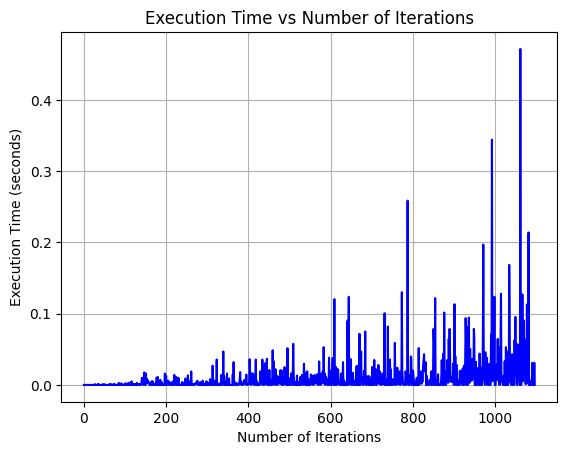

In [8]:
# Plotting the complexity results
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(complexity))], complexity, linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [9]:
np.average(complexity)

0.010856913129307514

In [10]:
import time
import random
complexity_dynamic_programming = []
for i in range(0,3000):
  random_array = [random.randint(5,50) for i in range(i+5)]
  x = random.uniform(0,1)
  if x < 0.5:
    indexes = list(np.unique([random.randint(0,len(random_array)-1)for i in range(random.randint(2,len(random_array)-1))]))
    limit = sum([random_array[index]  for index in indexes ])
  else:
    limit = random.randint(5,50) * len(random_array)
  print(limit,i)
  start_time = time.time()
  result = knapsack_01(random_array,limit)
  end_time = time.time()
  complexity_dynamic_programming.append(end_time-start_time)

50 0


NameError: name 'knapsack_01' is not defined

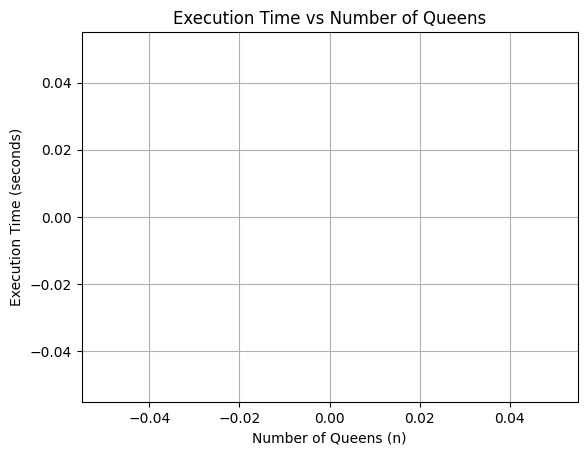

In [12]:
# Plotting the complexity results
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(complexity_dynamic_programming))], complexity_dynamic_programming, linestyle='-', color='b',label="values")
plt.xlabel('Number of Queens (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Queens')
plt.grid(True)
plt.show()

# Legacy Code

In [13]:
import random
import numpy as np

def knapsack_custom(array, limit):
    sorted_array = sorted(array)

    for i in range(1,len(array)+1):
        min_sum = sum(sorted_array[0:i])
        max_sum = sum(sorted_array[len(array)-i::])
        
        if limit == min_sum or limit == max_sum:
            return True

        if limit > min_sum and limit < max_sum:
            min_index = 0
            max_index = min_index + i
            while limit > min_sum and min_index < len(array)-i:
                min_index += 1
                max_index = min_index + i 
                min_sum = sum(sorted_array[min_index:max_index])

            while limit > max_sum and max_index-min_index > i:
                max_index -= 1 
                min_index = min_index - i 
                max_sum = sum(sorted_array[min_index:max_index])

                if min_index < 0:
                    min_index = 0
                

            result = combinations_of_sums_recursive(sorted_array[min_index:max_index], i, limit)
            if not result:
                continue

            if sum(result) == limit:
                return True

    return False

# Example usage:
array = [2,3,4,10,2,1,20,13]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_custom(array, limit)
print(result)


Original Array: [2, 3, 4, 10, 2, 1, 20, 13]
Selected Indices: [1, 2, 5, 6, 7]
Limit: 41
False


In [89]:
def knapsack_custom_combinatorics(array, limit):
    sorted_array = sorted(array)
    dummy_list = []

    for i in range(sorted_array[0],sorted_array[-1]):
        if i not in sorted_array:
            dummy_list.append(i)

    new_array = [i for i in range(sorted_array[0],sorted_array[-1]+1)]
    #print(new_array)
    #print(sorted_array)

    

    
        
    if len(new_array) == 0:
        return False
    elif limit < new_array[0] or limit > (new_array[-1] * (new_array[-1]+1))/2:
        return False
    elif len(new_array) == 1:
        if limit != new_array[0]:
            return False
    else:
        pass

    count = 0
    if len(dummy_list) > 0:
        for el in dummy_list:
            result = knapsack_custom(sorted_array, el)
            if result:
                count += 1

            if count > len(dummy_list)**(1/2):
                return True
    else:
        return True
    
    if count > len(dummy_list)**(1/2):
        return True
    else:
        return False
# Example usage:
array = [3,1,10,2,100,4,5,20]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_custom_combinatorics(array, limit)
print(result)

Original Array: [3, 1, 10, 2, 100, 4, 5, 20]
Selected Indices: [0, 1, 3, 5, 6, 7]
Limit: 35
True


In [96]:
import random
import numpy as np

random.seed(42)
error_rate = []


for iter in range(5,50):
    result_array = []
    for i in range(5, 100):
        k = iter
        array = [random.randint(1, k) for i in range(int(k))]

        # Scale the array to integers while maintaining proportions
        #avg = np.average(array)
        #u_number = max(array)-min(array)
        #array = [int((i-avg)/u_number*7) for i in array]
        #print(array)
        x = random.uniform(0,1)
        if x < 0.5:
            indexes = list(np.unique([int(random.randint(0, len(array)-1)) for i in range(random.randint(2, len(array)-1))]))
            sum_of_values = sum([array[index] for index in indexes])
        else:
            sum_of_values = random.randint(1, k) * k
        result_ground_truth = knapsack_01(array,sum_of_values)
        result = knapsack_custom_combinatorics(array, sum_of_values)
        result_array.append(result_ground_truth == result)

    diff = abs(np.count_nonzero(result_array) - len(result_array))
    print(diff)
    error_rate.append(diff)

print(sum(error_rate)/10)


42
52
44
39
36
40
35
30
27
27
19
23
17
17
9
7
8
14
11
7
9
7
10
8
7
3
6
5
4
0
6
5
4
3
2
3
2
2
0
3
3
2
3
0
1
60.2


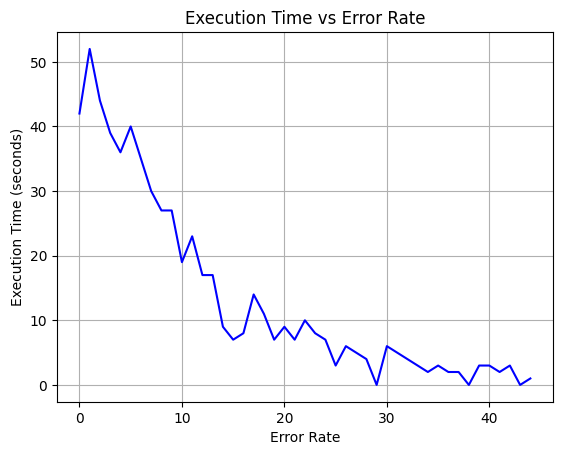

In [97]:
# Plotting the complexity results
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(error_rate))], error_rate, linestyle='-', color='b',label="values")
plt.xlabel('Error Rate')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Error Rate')
plt.grid(True)
plt.show()

In [92]:
import time
import random
complexity = []
for iter in range(10,3000):
  random_array = [random.randint(5,iter) for i in range(iter)]
  x = random.uniform(0,1)
  if x < 0.5:
    indexes = list(np.unique([random.randint(0,len(random_array)-1)for i in range(random.randint(2,len(random_array)-1))]))
    limit = sum([random_array[index]  for index in indexes ])
  else:
    limit = random.randint(5,50) * len(random_array)
  print(limit,iter)
  start_time = time.time()
  result = knapsack_custom_combinatorics(random_array,limit)
  end_time = time.time()
  complexity.append(end_time-start_time)

290 10
264 11
27 12
208 13
154 14
95 15
512 16
527 17
792 18
76 19
94 20
189 21
880 22
1150 23
75 24
218 25
390 26
1269 27
194 28
638 29
271 30
837 31
1216 32
45 33
238 34
336 35
372 36
999 37
377 38
936 39
280 40
1066 41
657 42
731 43
704 44
1710 45
275 46
75 47
1056 48
1323 49
225 50
781 51
832 52
265 53
432 54
809 55
289 56
1140 57
1972 58
2478 59
137 60
1156 61
2542 62
2457 63
448 64
226 65
2970 66
2948 67
1700 68
193 69
874 70
1148 71
3240 72
1825 73
1326 74
450 75
1140 76
669 77
1638 78
2133 79
864 80
3240 81
984 82
2407 83
1555 84
1403 85
1806 86
1740 87
2351 88
2581 89
4410 90
1725 91
920 92
4557 93
1415 94
1819 95
1440 96
2775 97
784 98
484 99
3400 100
3373 101
3087 102
927 103
2008 104
2415 105
4452 106
1246 107
5076 108
1100 109
3895 110
3956 111
896 112
3854 113
1596 114
1238 115
3480 116
945 117
3658 118
521 119
720 120
968 121
4004 122
4457 123
1545 124
3305 125
2394 126
1651 127
2569 128
4902 129
6240 130
6288 131
1452 132
3857 133
6030 134
5670 135
2856 136
2740 137
317

In [98]:
import numpy as np
from scipy.optimize import curve_fit

def fit_complexity(times, complexity_function):
    """
    Estimate the complexity of an algorithm by fitting a curve to the time measurements.

    Parameters:
    - times: List of time measurements
    - complexity_function: Function representing the expected growth rate (e.g., linear, quadratic)

    Returns:
    - Tuple containing the fitted parameters
    """
    input_sizes = np.arange(len(times))
    # Fit the data to the provided complexity function
    params, covariance = curve_fit(complexity_function, input_sizes, times)
    return params

# Example usage:
times = np.array(complexity)

# Define a linear complexity function (you can change this based on your expectation)
def linear_complexity(n, a, b):
    return a * n + b

# Fit the data using the linear complexity function
params = fit_complexity(times, linear_complexity)

# Output the parameters (a and b)
a, b = params
print(f"Linear Complexity: a={a}, b={b}")


Linear Complexity: a=0.00025136963636818166, b=-0.14197642286391


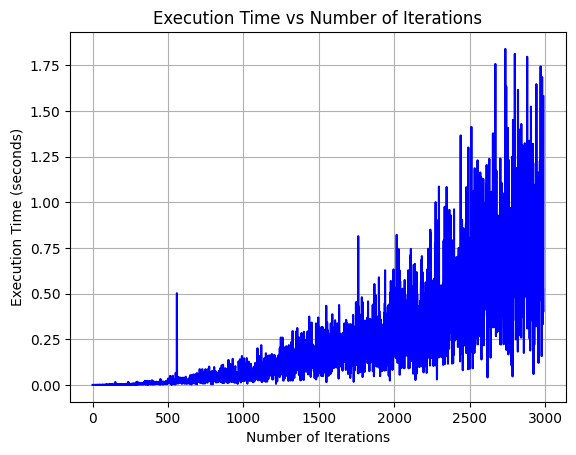

In [94]:
# Plotting the complexity results
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(complexity))], complexity, linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

0.17005763587003908

In [604]:
import time
import random
complexity = []
for i in range(0,3000):
  random_array = [random.randint(5,i+5) for i in range(i+5)]
  x = random.uniform(0,1)
  if x < 0.5:
    indexes = list(np.unique([random.randint(0,len(random_array)-1)for i in range(random.randint(2,len(random_array)-1))]))
    limit = sum([random_array[index]  for index in indexes ])
  else:
    limit = random.randint(5,50) * len(random_array)
  print(limit,i)
  start_time = time.time()
  result = knapsack_01(random_array,limit)
  end_time = time.time()
  complexity.append(end_time-start_time)

16 0
186 1
336 2
25 3
35 4
130 5
99 6
552 7
62 8
68 9
330 10
19 11
799 12
216 13
45 14
75 15
85 16
858 17
95 18
26 19
1225 20
160 21
106 22
588 23
1334 24
300 25
248 26
69 27
1617 28
1292 29
63 30
88 31
293 32
228 33
309 34
1880 35
140 36
882 37
57 38
318 39
765 40
28 41
303 42
672 43
328 44
402 45
185 46
525 47
2120 48
540 49
1815 50
1904 51
855 52
2610 53
354 54
667 55
121 56
679 57
345 58
124 59
412 60
498 61
232 62
3128 63
114 64
385 65
67 66
2160 67
3066 68
2516 69
124 70
1155 71
2233 72
2106 73
1000 74
1143 75
1782 76
2132 77
2241 78
1478 79
244 80
516 81
269 82
312 83
3738 84
563 85
1452 86
492 87
558 88
861 89
1001 90
277 91
1696 92
1176 93
3762 94
800 95
243 96
1632 97
1545 98
5200 99
2415 100
1536 101
5029 102
2376 103
2071 104
2200 105
1355 106
933 107
3051 108
1198 109
2760 110
5336 111
5499 112
1704 113
2842 114
5760 115
2050 116
1708 117
735 118
3596 119
3250 120
585 121
966 122
5376 123
1783 124
2481 125
6026 126
2002 127
2920 128
2116 129
5265 130
1088 131
3079 132
2335

KeyboardInterrupt: 

In [99]:
import random
import numpy as np

random.seed(42)
error_rate = []


for iter in range(5,50):
    result_array = []
    for i in range(5, 100):
        k = iter
        array = [random.randint(1, k) for i in range(int(k)) if random.randint(1, k)]

        # Scale the array to integers while maintaining proportions
        #avg = np.average(array)
        #u_number = max(array)-min(array)
        #array = [int((i-avg)/u_number*7) for i in array]
        #print(array)
        x = random.uniform(0,1)
        if x < 0.5:
            indexes = list(np.unique([int(random.randint(0, len(array)-1)) for i in range(random.randint(2, len(array)-1))]))
            sum_of_values = sum([array[index] for index in indexes])
        else:
            sum_of_values = random.randint(1, k) * k
        result_ground_truth = knapsack_01(array,sum_of_values)
        result = knapsack_custom_combinatorics(array, sum_of_values)
        result_array.append(result_ground_truth == result)

    diff = abs(np.count_nonzero(result_array) - len(result_array))
    print(diff)
    error_rate.append(diff)

print(sum(error_rate)/10)

42
52
44
39
36
40
35
30
27
27
19
23
17
17
9
7
8
14
11
7
9
7
10
8
7
3
6
5
4
0
6
5
4
3
2
3
2
2
0
3
3
2
3
0
1
60.2


In [2]:
def is_prime(n):
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False

    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6

    return True

# Example usage
number = 37
if is_prime(number):
    print(f"{number} is a prime number.")
else:
    print(f"{number} is not a prime number.")


37 is a prime number.


In [3]:
from itertools import combinations

def knapsack_01_comb(array, comb_num, limit):
    n = len(array)

    # Generate all combinations of comb_num elements from the array
    all_combinations = list(combinations(array, comb_num))
    print(all_combinations)


    return all_combinations
    # Check if any combination sums up to the desired limit
    for combo in all_combinations:
        if sum(combo) == limit:
            return True

    return False

# Example usage:
import random

array = [random.randint(1, 10) for _ in range(30)]
comb_num = 3
limit = random.randint(1, 50)

print("Original Array:", array)
print("Combination Number:", comb_num)
print("Limit:", limit)
result = knapsack_01_comb(array, comb_num, limit)
print(result)


Original Array: [9, 4, 4, 9, 8, 8, 8, 1, 7, 7, 3, 1, 5, 6, 8, 10, 1, 3, 9, 4, 6, 5, 8, 4, 9, 2, 4, 9, 1, 10]
Combination Number: 3
Limit: 39
[(9, 4, 4), (9, 4, 9), (9, 4, 8), (9, 4, 8), (9, 4, 8), (9, 4, 1), (9, 4, 7), (9, 4, 7), (9, 4, 3), (9, 4, 1), (9, 4, 5), (9, 4, 6), (9, 4, 8), (9, 4, 10), (9, 4, 1), (9, 4, 3), (9, 4, 9), (9, 4, 4), (9, 4, 6), (9, 4, 5), (9, 4, 8), (9, 4, 4), (9, 4, 9), (9, 4, 2), (9, 4, 4), (9, 4, 9), (9, 4, 1), (9, 4, 10), (9, 4, 9), (9, 4, 8), (9, 4, 8), (9, 4, 8), (9, 4, 1), (9, 4, 7), (9, 4, 7), (9, 4, 3), (9, 4, 1), (9, 4, 5), (9, 4, 6), (9, 4, 8), (9, 4, 10), (9, 4, 1), (9, 4, 3), (9, 4, 9), (9, 4, 4), (9, 4, 6), (9, 4, 5), (9, 4, 8), (9, 4, 4), (9, 4, 9), (9, 4, 2), (9, 4, 4), (9, 4, 9), (9, 4, 1), (9, 4, 10), (9, 9, 8), (9, 9, 8), (9, 9, 8), (9, 9, 1), (9, 9, 7), (9, 9, 7), (9, 9, 3), (9, 9, 1), (9, 9, 5), (9, 9, 6), (9, 9, 8), (9, 9, 10), (9, 9, 1), (9, 9, 3), (9, 9, 9), (9, 9, 4), (9, 9, 6), (9, 9, 5), (9, 9, 8), (9, 9, 4), (9, 9, 9), (9, 9, 2), (9, 9,

In [4]:
import random
import numpy as np

def knapsack_custom_prime(array, limit,comb_num):
    sorted_array = sorted([i for i in array if is_prime(i)])

    
    min_sum = sum(sorted_array[0:comb_num])
    max_sum = sum(sorted_array[len(array)-comb_num::])
    
    if limit == min_sum or limit == max_sum:
        return True

    if limit > min_sum and limit < max_sum:
        min_index = 0
        max_index = min_index + comb_num
        while limit > min_sum and min_index < len(array)-comb_num:
            min_index += 1
            max_index = min_index + comb_num 
            min_sum = sum(sorted_array[min_index:max_index])

        while limit > max_sum and max_index-min_index > comb_num:
            max_index -= 1 
            min_index = min_index - comb_num 
            max_sum = sum(sorted_array[min_index:max_index])

            if min_index < 0:
                min_index = 0
            

        result = combinations_of_sums_recursive(sorted_array[min_index:max_index], comb_num, limit)
        if not result:
            return False

        if sum(result) == limit:
            return True

    return False

# Example usage:
array = [i for i in range(30)]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(3)]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_custom_prime(array, limit,3)
print(result)


Original Array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Selected Indices: [1, 23, 29]
Limit: 53
False


In [5]:
def knapsack_custom_combinatorics_prime(array, limit,comb_num):
    sorted_array = sorted(array)
    not_prime = []

    for i in range(sorted_array[0],sorted_array[-1]):
        if not is_prime(i):
            not_prime.append(i)

    new_array = [i for i in range(sorted_array[0],sorted_array[-1]+1)]
    #print(new_array)
    #print(sorted_array)

    

    
        
    if len(new_array) == 0:
        return False
    elif limit < new_array[0] or limit > (new_array[-1] * (new_array[-1]+1))/2:
        return False
    elif len(new_array) == 1:
        if limit != new_array[0]:
            return False
    else:
        pass

    count = 0
    if len(not_prime) > 0:
        for el in not_prime:
            result = knapsack_custom_prime(sorted_array, el,comb_num)
            if result:
                count += 1

            if count > len(not_prime)**(1/2):
                return True
    else:
        return True
    
    if count > len(not_prime)**(1/2):
        return True
    else:
        return False
# Example usage:
array = [i for i in range(10) if is_prime(i)]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(3)]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_custom_combinatorics_prime(array, limit,3)
print(result)

Original Array: [2, 3, 5, 7]
Selected Indices: [0, 2]
Limit: 7
False


In [6]:
import random
import numpy as np

random.seed(42)
error_rate = []


for iter in range(5,20):
    result_array = []
    k = iter*1000
    for i in range(k, k+30):
        
        array = [i for i in range(i) if is_prime(i)]

        # Scale the array to integers while maintaining proportions
        #avg = np.average(array)
        #u_number = max(array)-min(array)
        #array = [int((i-avg)/u_number*7) for i in array]
        #print(array)
        indexes = list(np.unique([int(random.randint(0, len(array)-1)) for i in range(iter)]))
        sum_of_values = sum([array[index] for index in indexes])
        if sum_of_values <= 5:
            continue
        result_ground_truth = knapsack_01(array,sum_of_values)
        result = knapsack_custom_combinatorics_prime(array, sum_of_values,iter)
        result_array.append(result_ground_truth == result)
        print(result_ground_truth,result)



    diff = abs(np.count_nonzero(result_array) - len(result_array))
    print(diff)
    error_rate.append(diff)

print(sum(error_rate)/10)

NameError: name 'knapsack_01' is not defined

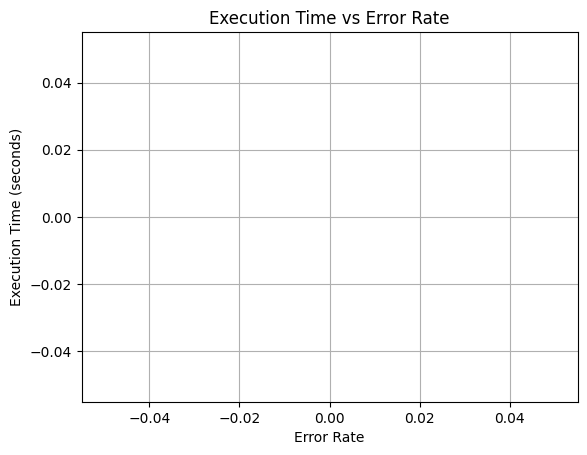

In [7]:
# Plotting the complexity results
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(error_rate))], error_rate, linestyle='-', color='b',label="values")
plt.xlabel('Error Rate')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Error Rate')
plt.grid(True)
plt.show()

In [8]:
import time
import random
complexity = []
dict_of_error = {}
for k in range(2,30):
   error_rate = []
   start = int(k*1000)
   end = start + 30
   print(start,end,'iter')
   for i in range(start,end):
      random_array = [i for i in range(i+5) if is_prime(i)]
      indexes = list(np.unique([random.randint(0,len(random_array)-1)for i in range(k)]))
      limit = random_array[-1]+k
      while limit < 5:
         limit += k

       
      
      result = knapsack_custom_combinatorics_prime(random_array,limit,k)
      if not result:
         print('ERROR')
         break
      error_rate.append(np.count_nonzero(random_array) - len(random_array))
   dict_of_error[k] = error_rate

2000 2030 iter


NameError: name 'combinations_of_sums_recursive' is not defined

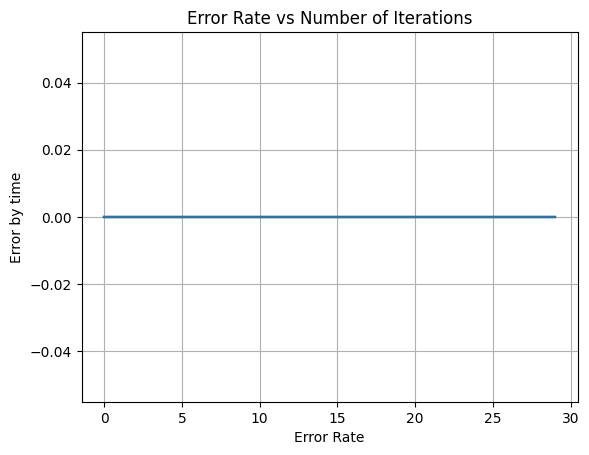

In [ ]:
# Plotting the complexity results
import matplotlib.pyplot as plt
for key in dict_of_error.keys():
    plt.plot([i for i in range(len(dict_of_error[key]))], dict_of_error[key], linestyle='-',label="values")
    
plt.xlabel('Error Rate')
plt.ylabel('Error by time')
plt.title('Error Rate vs Number of Iterations')
plt.grid(True)
plt.show()

In [ ]:
import time
import random
complexity = []
dict_of_error = {}
for k in range(2,30):
   error_rate = []
   print(k,'ITER')
   for i in range(0,10000):
      random_array = [i for i in range(i+5) if is_prime(i)]
      indexes = list(np.unique([random.randint(0,len(random_array)-1)for i in range(k)]))
      limit = random_array[-1]+k
      while limit < 5:
         limit += k
      
      result = knapsack_custom_combinatorics_prime(random_array,limit,k)
      error_rate.append(np.count_nonzero(random_array) - len(random_array))
      complexity.append(end_time-start_time)
   dict_of_error[k] = error_rate

2 ITER


KeyboardInterrupt: 

In [3]:
# Plotting the complexity results
import matplotlib.pyplot as plt
for key in dict_of_error.keys():
    plt.plot([i for i in range(len(dict_of_error[key]))], dict_of_error[key], linestyle='-',label="values")
    
plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate (seconds)')
plt.title('Error Rate vs Number of Iterations')
plt.grid(True)
plt.show()

NameError: name 'dict_of_error' is not defined

In [1]:
from itertools import combinations
array = [i for i in range(100) if is_prime(i)]
all_combinations = list(combinations(array, 3))
all_combinations = sorted([sum(i) for i in all_combinations])

NameError: name 'is_prime' is not defined

0
1
[0]
2
[0]
[]
3
[0]
[]
[1, 2, 3]
4
[0]
[]
[1, 2, 3, 3, 4, 5]
[3, 4, 5, 6]
5
[0]
[]
[1, 2, 3, 3, 4, 4, 5, 5, 6, 7]
[3, 4, 5, 5, 6, 6, 7, 7, 8, 9]
[]
6
[0]
[]
[1, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 9]
[3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11, 12]
[]
[10, 11, 12, 13, 14, 15]
7
[0]
[]
[1, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 11]
[3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13, 14, 15]
[]
[10, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 19, 20]
[]
8
[0]
[]
[1, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 13]
[3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 18]
[]
[10, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,

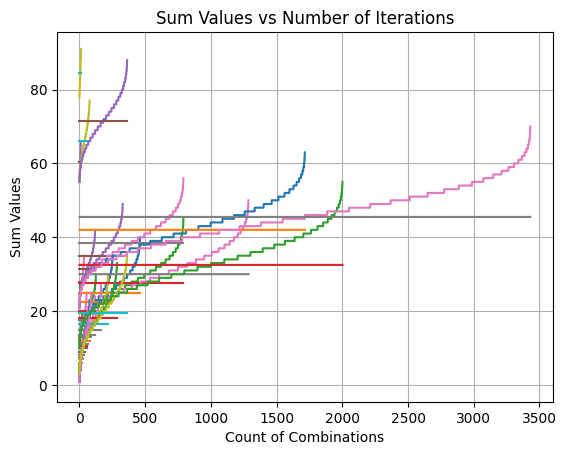

In [18]:
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
for k in range(15):
    print(k)
    for selection in range(k):
        array = [i for i in range(k) if is_prime(selection)]
        all_combinations = list(combinations(array, selection))
        all_combinations = sorted([sum(i) for i in all_combinations])
        print(all_combinations)
        values = [np.mean(all_combinations) for iter in range(len(all_combinations))]
        plt.plot([i for i in range(len(all_combinations))], all_combinations, linestyle='-',label="values")
        plt.plot([i for i in range(len(values))], values, linestyle='-',label="values")

plt.xlabel('Count of Combinations')
plt.ylabel('Sum Values')
plt.title('Sum Values vs Number of Iterations')
plt.grid(True)
plt.show()

In [ ]:
from itertools import combinations
for k in range(30,50):
    for selection in range(3,k):
        array = [i for i in range(k*3) if is_prime(selection)]
        all_combinations = list(combinations(array, k))
        all_combinations = sorted([sum(i) for i in all_combinations])
        plt.plot([i for i in range(len(all_combinations))], all_combinations, linestyle='-',label="values")

plt.xlabel('Number of Iterations')
plt.ylabel('Sum Values')
plt.title('Sum Values vs Number of Iterations')
plt.grid(True)
plt.show()

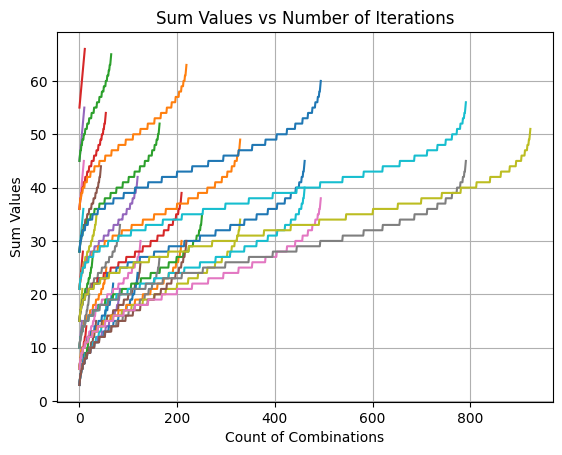

In [5]:
from itertools import combinations
import matplotlib.pyplot as plt
for k in range(5,13):
    for selection in range(3,k):
        array = [i for i in range(k)]
        all_combinations = list(combinations(array, selection))
        all_combinations = sorted([sum(i) for i in all_combinations])
        plt.plot([i for i in range(len(all_combinations))], all_combinations, linestyle='-',label="values")

plt.xlabel('Count of Combinations')
plt.ylabel('Sum Values')
plt.title('Sum Values vs Number of Iterations')
plt.grid(True)
plt.show()